# Unit 5 - Financial Planning


In [89]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [90]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [91]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [92]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [112]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url)
btc = my_btc_data.json()
btc_price = btc["data"]['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url)
eth = eth_data.json()
eth_price = eth["data"]["1027"]['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price 
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $65166.00
The current value of your 5.3 ETH is $9349.15


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [105]:
# Current amount of shares
# YOUR CODE HERE!
my_shares = {
    'shares': [200, 50]
}


In [95]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(alpaca_api_key,
                      alpaca_secret_key,
                      api_version="v2")

In [111]:
# Format current date as ISO format
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

df_shares = pd.DataFrame(my_shares, index=tickers)
my_spy = df_shares.loc["SPY"]["shares"]
my_agg = df_shares.loc["AGG"]["shares"]


# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

today = pd.Timestamp("2021-03-15", tz="America/New_York").isoformat()

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!

df_portfolio.index = df_portfolio.index.date
df_portfolio

AGG                                     SPY                   \
             open    high    low   close   volume    open     high     low   
2021-03-15  113.6  114.01  113.6  113.94  4210749  394.33  396.685  392.03   

                              
             close    volume  
2021-03-15  396.47  64471980

In [104]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.94
Current SPY closing price: $396.47


In [108]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19823.50
The current value of your 200 AGG shares is $22788.00


### Savings Health Analysis

In [130]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 1200

# Create savings DataFrame
# YOUR CODE HERE!
shares_value = my_agg_value + my_spy_value
crypto_value = my_btc_value + my_eth_value

my_assets = {
    "amount": [shares_value, crypto_value]  
}
assets = ['shares', 'crypto']
df_savings = pd.DataFrame(my_assets, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
shares,42611.500
crypto,74515.147


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

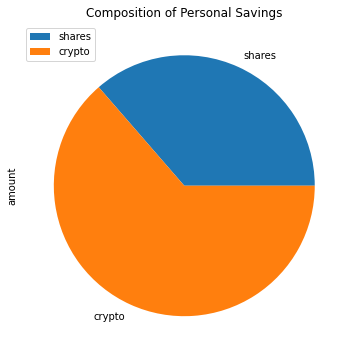

In [148]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings", figsize=(6,6))

In [140]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = shares_value + crypto_value

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have have reached your financial goal!")
else:
    short = emergency_fund -  total_savings
    print(f"You are ${round(short, 2)} away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [171]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-17', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-17', tz='America/New_York').isoformat()

In [172]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low   close   volume     open   
time                                                                          
2017-03-28 00:00:00-04:00  108.63  108.68  108.35  108.38  1804002  233.270   
2017-03-29 00:00:00-04:00  108.48  108.62  108.46  108.60  1635068  235.010   
2017-03-30 00:00:00-04:00  108.52  108.58  108.38  108.41  1611863  235.490   
2017-03-31 00:00:00-04:00  108.44  108.53  108.42  108.52  3151075  235.905   
2017-04-03 00:00:00-04:00  108.31  108.68  108.30  108.67  3857775  235.800   

                                                              
                             high      low   close    volume  
time                                                          
2017-03-28 00:00:00-04:00  235.81  233.140  235.27  64554450  
2017-03-29 00:00:00-04:00  235.81  234.725  235.59  40664024  
2017-03-30 00:00:00-04:00  236.52  235.270  236.27  40604487  
2017-03-31 00:00:00-04:00  236.51  235.680  235.71  47583793  
2017-04-03 00:00:00-04:00  236.03  233.910  235.37  58627715

In [191]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims = 100

MC_Returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [192]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_Returns.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2017-03-28 00:00:00-04:00  108.63  108.68  108.35  108.38  1804002   
2017-03-29 00:00:00-04:00  108.48  108.62  108.46  108.60  1635068   
2017-03-30 00:00:00-04:00  108.52  108.58  108.38  108.41  1611863   
2017-03-31 00:00:00-04:00  108.44  108.53  108.42  108.52  3151075   
2017-04-03 00:00:00-04:00  108.31  108.68  108.30  108.67  3857775   

                                            SPY                           \
                          daily_return     open    high      low   close   
time                                                                       
2017-03-28 00:00:00-04:00          NaN  233.270  235.81  233.140  235.27   
2017-03-29 00:00:00-04:00     0.002030  235.010  235.81  234.725  235.59   
2017-03-30 00:00:00-04:00    -0.001750  235.490  236.52  235.270  236.27   
2017-03-31 00:00:00-04:00     0.001015  235.905  236.51  235.680  235.71   
2017-04-03 00:00:00-04:00     0.001382  235.800  236.03  233.910  235.37   

                                                  
                             volume daily_return  
time                                              
2017-03-28 00:00:00-04:00  64554450          NaN  
2017-03-29 00:00:00-04:00  40664024     0.001360  
2017-03-30 00:00:00-04:00  40604487     0.002886  
2017-03-31 00:00:00-04:00  47583793    -0.002370  
2017-04-03 00:00:00-04:00  58627715    -0.001442

In [193]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996450,1.006396,0.999747,0.993815,1.006821,0.992057,1.004684,1.007106,0.991937,0.996465,...,1.008586,1.013087,1.001625,1.003923,0.992642,1.002746,0.996683,0.998504,0.993136,0.995643
2,0.997918,1.013522,0.999497,0.997236,1.006344,0.988912,0.991738,1.009325,0.980134,1.011269,...,1.008158,1.025835,1.004576,1.006251,0.989961,0.997619,0.984642,0.994541,0.992133,1.000149
3,0.987664,1.011081,1.007750,0.990054,0.989858,0.982175,0.986956,1.007914,0.982127,1.024026,...,1.010917,1.024513,1.011166,1.004396,0.994052,1.002757,0.982208,0.994342,0.983410,1.007881
4,0.990353,1.023712,1.000487,0.988386,0.966704,0.972737,0.984928,1.011183,0.989579,1.018967,...,1.006226,1.023263,1.020512,0.999479,0.985882,1.005563,0.991400,0.989735,0.969537,1.012464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.409328,9.172034,11.825961,15.540601,10.262334,8.903747,9.982958,36.807114,22.057952,16.055775,...,16.087971,12.527734,38.870779,20.267597,26.098618,3.640140,13.376329,10.979150,8.667463,31.651587
7557,8.347179,9.281086,11.828297,15.694514,10.268483,9.011270,9.841519,36.772220,22.060155,15.980599,...,15.977320,12.608251,39.617512,20.350382,25.871383,3.646646,13.135765,11.023445,8.766313,31.886280
7558,8.402225,9.378475,11.841404,15.698437,10.134369,8.954308,9.803623,36.712166,22.174229,16.222492,...,16.090632,12.665191,39.528617,20.318892,25.570388,3.657015,12.949910,10.977307,8.763845,32.147298
7559,8.325489,9.392682,11.879902,15.912986,10.220550,8.983040,9.766245,37.036472,22.599766,16.398627,...,15.788579,12.377305,39.212112,20.164290,25.231007,3.656278,12.971006,10.940959,8.868969,31.680645


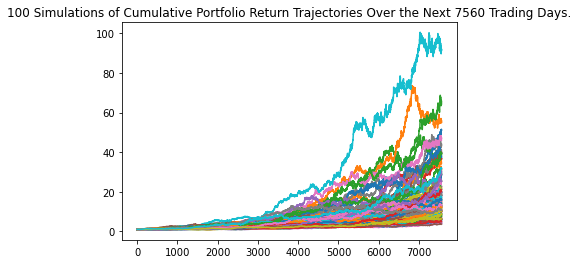

In [194]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_Returns.plot_simulation()

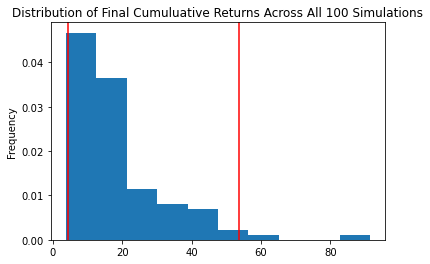

In [195]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_Returns.plot_distribution()

### Retirement Analysis

In [198]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
ret_tbl = MC_Returns.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(ret_tbl)

count           100.000000
mean             18.710451
std              14.275258
min               3.685692
25%               9.957431
50%              14.216457
75%              21.794642
max              91.512535
95% CI Lower      4.246880
95% CI Upper     53.543009
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [202]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(ret_tbl['95% CI Lower'] * initial_investment, 2)
ci_upper = round(ret_tbl['95% CI Upper'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $84937.61 and $1070860.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [203]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(ret_tbl['95% CI Lower'] * initial_investment, 2)
ci_upper = round(ret_tbl['95% CI Upper'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $127406.41 and $1606290.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002773,0.995921,0.995673,0.994602,1.005021,0.998532,1.001126,1.005124,0.994500,0.999171,...,1.002697,1.007377,0.999067,0.997822,0.998338,1.003092,0.997770,1.005395,0.999348,1.005300
2,1.004519,0.994920,0.995504,0.997885,0.999418,1.002665,0.998714,1.009062,0.992389,0.997706,...,1.004034,1.008911,0.999323,1.000654,0.999466,1.004265,0.994733,1.003748,0.996511,1.012382
3,1.003420,0.989709,0.994363,1.001670,1.004349,1.002377,1.001845,1.011481,0.991912,0.994580,...,1.002351,1.006664,1.002174,0.998934,1.003854,1.010202,0.996131,1.002018,0.999665,1.014892
4,0.999165,0.990064,0.986792,1.003455,1.007765,1.007514,0.997581,1.015886,0.986637,0.998216,...,1.002834,0.999865,1.000353,1.003079,1.003303,1.012221,0.997754,1.000544,1.001517,1.013704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.266580,1.196174,1.233861,1.609848,1.173492,1.242440,1.329611,1.157732,1.354542,0.980124,...,1.193369,1.265576,1.176646,1.146853,1.214548,1.145207,1.193672,1.131104,1.003777,1.234636
1257,1.259830,1.201814,1.231141,1.621046,1.172662,1.239173,1.331916,1.157722,1.354061,0.980815,...,1.194320,1.269009,1.182694,1.146907,1.213701,1.143455,1.200143,1.131160,1.006530,1.234546
1258,1.265916,1.196261,1.226184,1.622075,1.174943,1.240829,1.335755,1.157986,1.350916,0.981539,...,1.203336,1.271746,1.178878,1.148263,1.213656,1.146064,1.197322,1.134041,1.005902,1.236184
1259,1.268268,1.202293,1.223321,1.623647,1.170809,1.248084,1.336792,1.162289,1.341674,0.977214,...,1.200892,1.273981,1.175435,1.145972,1.210717,1.146312,1.194024,1.132655,1.007751,1.242664


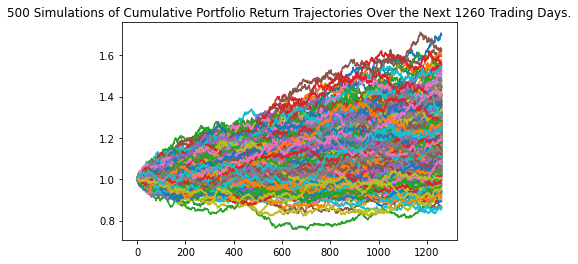

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

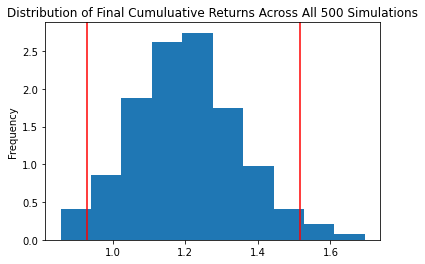

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.202273
std               0.145565
min               0.856322
25%               1.100622
50%               1.197687
75%               1.292270
max               1.695081
95% CI Lower      0.928556
95% CI Upper      1.517173
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


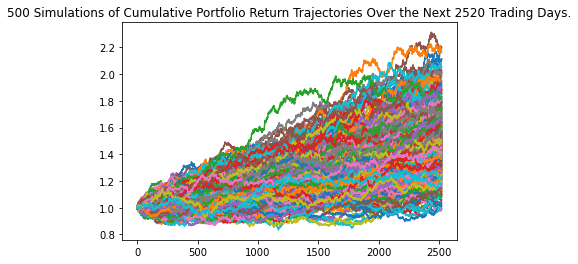

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

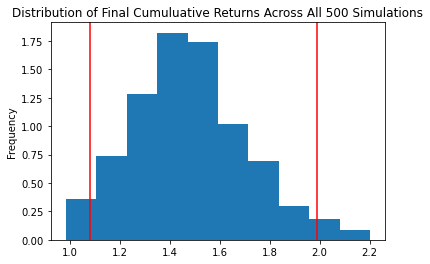

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
